In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First I started out by importing the necessary libraries.

In [ ]:
crime_df = pd.read_csv('/content/sample_data/crimestat (1).csv', index_col='INC NUMBER', nrows=100000)

Then I read in the csv file and saved it as crime_df. In my original read I experienced an error messageat around 130k rows, so I limited it to pull in only 100,000 rows.

In [ ]:
crime_df.head()

,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
INC NUMBER,,,,,,
201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE


I used the "head" method to ensure my data was pulling in from the file.

In [61]:
crime_df.sort_index(inplace=True)
crime_df.dropna(inplace=True)
crime_df.shape

(70357, 6)

I used sort_index and droped the "na" rows with missing values. Then I used the .shape method to see how many rows remained after dropping the rows with missing values.

In [ ]:
crime_df.ZIP.value_counts().head()

85015.0    3322
85008.0    3149
85051.0    2917
85041.0    2905
85017.0    2708
Name: ZIP, dtype: int64

Here I did a value_count to show the top 5 ZIP codes with the highest crime occurrence.

In [ ]:
crime_df['100 BLOCK ADDR'].value_counts().head()

18XX W BELL RD            403
61XX N 35TH AVE           333
57XX N 19TH AVE           261
76XX W THOMAS RD          250
16XX W BETHANY HOME RD    229
Name: 100 BLOCK ADDR, dtype: int64

Next, I wanted to see the top 5 Block Addresses with the highest crime occurrence.

LARCENY-THEFT                            35952
BURGLARY                                 15430
MOTOR VEHICLE THEFT                       9439
AGGRAVATED ASSAULT                        3377
DRUG OFFENSE                              2852
ROBBERY                                   1974
RAPE                                      1047
ARSON                                      144
MURDER AND NON-NEGLIGENT MANSLAUGHTER      142
Name: UCR CRIME CATEGORY, dtype: int64


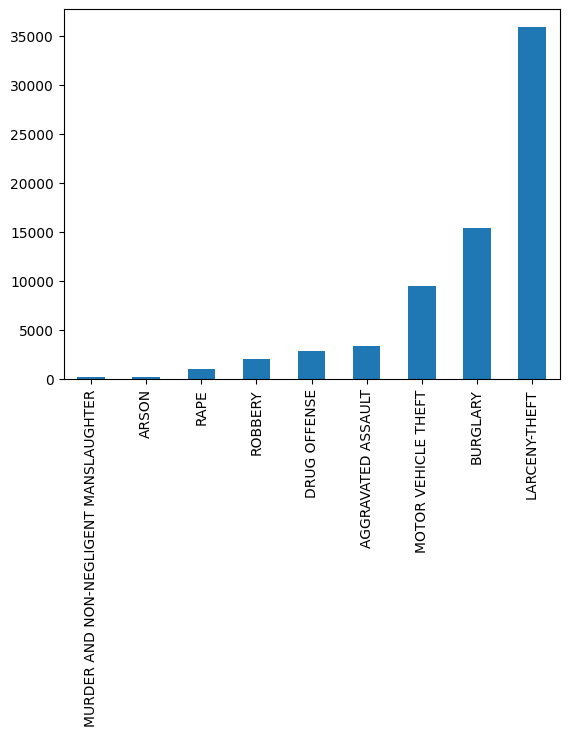

In [ ]:
categories = crime_df['UCR CRIME CATEGORY'].value_counts()
categories.sort_values().plot.bar()
print(categories)

In this code I created a bar graph showing the most common crime categories, this helped in displaying the number of crimes in a more digestible way. It also shaped what crime I would focus on to further analyze the data.

In [ ]:
crime_group = crime_df.groupby('UCR CRIME CATEGORY')
larceny = crime_group.get_group('LARCENY-THEFT')
larceny

,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
INC NUMBER,,,,,,
201500001965286,11/04/2015 11:17,11/04/2015 11:17,LARCENY-THEFT,N CENTRAL AVE & W THOMAS RD,85003.0,VEHICLE
201500001979643,11/13/2015 16:30,11/13/2015 16:30,LARCENY-THEFT,48XX N 43RD AVE,85031.0,RETAIL BUSINESS
201500002024630,11/01/2015 16:30,11/01/2015 16:30,LARCENY-THEFT,25XX W GREENWAY RD,85023.0,STREET / ROADWAY / ALLEY / SIDEWALK
201500002101675,11/01/2015 00:30,11/01/2015 07:00,LARCENY-THEFT,42XX E WESTERN STAR BLVD,85044.0,DRIVEWAY
201500002102199,11/01/2015 10:08,11/01/2015 10:08,LARCENY-THEFT,168XX N TATUM BLVD,85254.0,RETAIL BUSINESS
...,...,...,...,...,...,...
202000000978074,03/20/2017 22:00,03/21/2017 10:00,LARCENY-THEFT,7XX E MONTEBELLO AVE,85014.0,VEHICLE
202000001043998,10/01/2016 00:00,06/23/2020 11:00,LARCENY-THEFT,12XX S 3RD ST,85004.0,FENCED COMMERCIAL YARD
202000001051850,02/01/2016 00:00,06/24/2020 00:00,LARCENY-THEFT,49XX E RAY RD,85044.0,DEPARTMENT / DISCOUNT STORE


Since larceny was the highest crime committed, in this code I used "groupby" to return only rows where the crime category was larceny. My intention was to use this extracted data to further drill down into any patterns or themes of this crime.

PARKING LOT                            4714
SINGLE FAMILY HOUSE                    4058
RETAIL BUSINESS                        3982
APARTMENT                              3394
VEHICLE                                2913
                                       ... 
JAIL / PRISON / PENITENTIARY              1
AUTO DEALERSHIP NEW/USED                  1
INDUSTRIAL SITE                           1
DOCK/WHARF/FREIGHT/MODAL TERMINAL         1
GAMBLING FACILITY/CASINO/RACE TRACK       1
Name: PREMISE TYPE, Length: 83, dtype: int64


<Axes: >

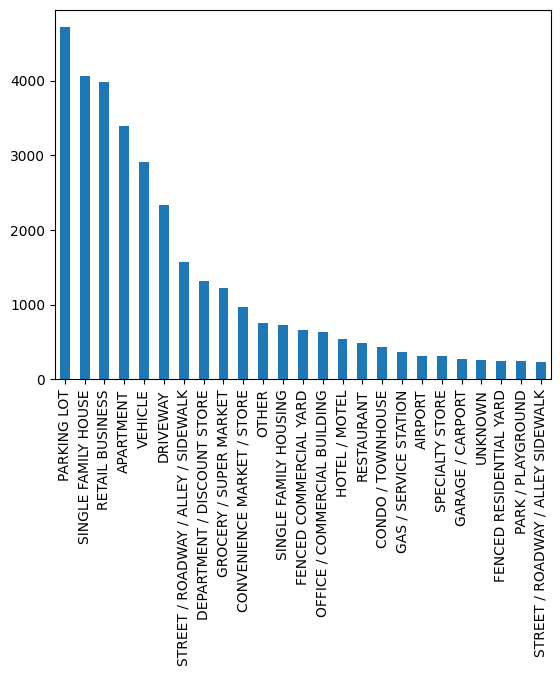

In [63]:
theft_loc = larceny['PREMISE TYPE'].value_counts()
print(theft_loc)
larceny['PREMISE TYPE'].value_counts().head(25).plot.bar()

I then wanted to see what premise type larceny was most committed in and can infer this is where it would be most likely to happen. I used plot.bar again to vizualize the data in a different way. This data would be impactful for law enforcement/ neighborhood watch groups to be aware of when delegating where attention should go to.

By extracting and displaying the data in different ways, and drilling down the highest crime category, I have (in this theoretical example) provided information that could be used by law enforcement, residents, and business owners to help them understand where higher patrolling, security cameras, and security gaurds would be of use.